# MACD

In [3]:
import pandas as pd
import numpy as np
import talib
import os

# 設定文件路徑
input_file = "data/股市資料_20240101-20250516.xlsx"
output_file = "data/股市資料_MACD.xlsx"

# 確保文件存在
if not os.path.exists(input_file):
    print(f"錯誤：找不到檔案 {input_file}")
else:
    print(f"讀取文件：{input_file}")

    # 讀取 Excel 檔案
    df = pd.read_excel(input_file)

    # 確保欄位名稱正確
    if not {"High", "Low", "Close"}.issubset(df.columns):
        print("錯誤：Excel 文件缺少必要的欄位 (High, Low, Close)")
    else:
        # 轉換為 NumPy 陣列
        high = df["High"].values.astype(np.float64)
        low = df["Low"].values.astype(np.float64)
        close = df["Close"].values.astype(np.float64)

        # 計算 MACD 指標
        df["MACD"], df["Signal"], df["MACD_Hist"] = talib.MACD(
            close, fastperiod=12, slowperiod=26, signalperiod=9
        )

        # 顯示最後 10 筆數據
        print(df.tail(10))

        # 儲存結果
        df.to_excel(output_file, index=False)
        print(f"MACD 計算結果已儲存到 {output_file}")


讀取文件：data/股市資料_20240101-20250516.xlsx
           Date        Open        High         Low       Close      MACD  \
350  2025-05-05  164.557024  166.178227  164.550382  165.196002  5.478136   
351  2025-05-06  103.536244  109.133068   94.119566   95.721243  0.578625   
352  2025-05-07  143.040244  150.774799  140.256991  144.556396  0.629065   
353  2025-05-08  151.001685  155.565781  149.142709  151.044759  1.179005   
354  2025-05-09  153.617749  155.151438  146.702668  150.871350  1.582600   
355  2025-05-12  168.139251  170.135212  167.050214  169.077193  3.333090   
356  2025-05-13  127.759610  132.089452  125.113114  128.329556  1.416049   
357  2025-05-14  112.886057  118.168397  103.135110  117.193647 -0.990379   
358  2025-05-15  139.267568  142.761971  132.872940  141.622406 -0.915737   
359  2025-05-16  195.640572  203.455368  190.433794  199.574648  3.776150   

       Signal  MACD_Hist  
350  0.899301   4.578835  
351  0.835166  -0.256541  
352  0.793946  -0.164881  
353  0

# 製圖

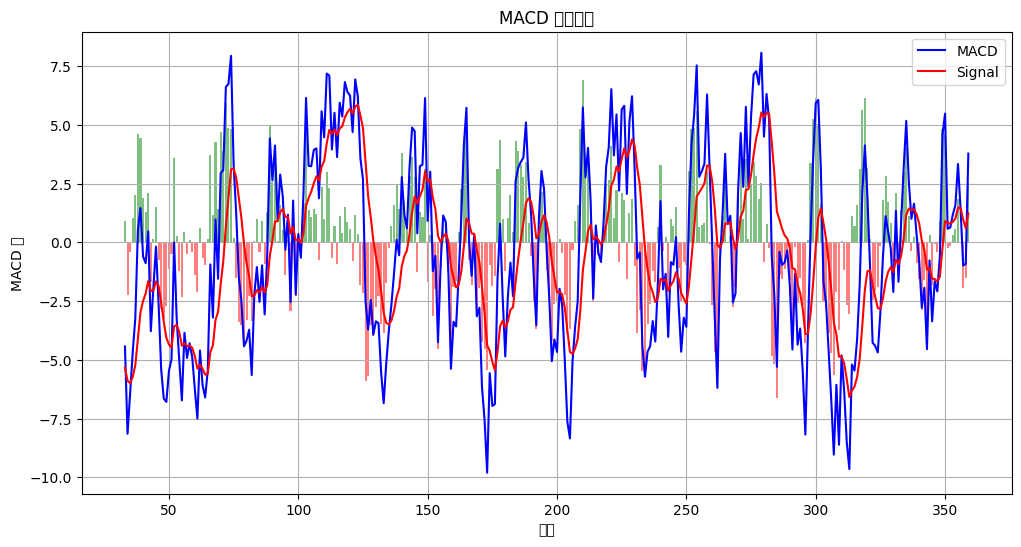

In [5]:
import matplotlib.pyplot as plt

if not {"High", "Low", "Close"}.issubset(df.columns):
    print("錯誤：Excel 文件缺少必要的欄位 (High, Low, Close)")
else:
    # 轉換為 NumPy 陣列
    high = df["High"].values.astype(np.float64)
    low = df["Low"].values.astype(np.float64)
    close = df["Close"].values.astype(np.float64)

    # 計算 MACD 指標
    df["MACD"], df["Signal"], df["MACD_Hist"] = talib.MACD(
        close, fastperiod=12, slowperiod=26, signalperiod=9
    )

    # 繪製 MACD 圖表
    plt.figure(figsize=(12, 6))

    # 繪製 MACD 和 Signal 線
    plt.plot(df.index, df["MACD"], label="MACD", color="blue")
    plt.plot(df.index, df["Signal"], label="Signal", color="red")

    # 繪製 MACD 柱狀圖
    plt.bar(df.index, df["MACD_Hist"], color=np.where(df["MACD_Hist"] >= 0, "green", "red"), alpha=0.5)

    # 設定標題和圖例
    plt.title("MACD 指標分析")
    plt.xlabel("時間")
    plt.ylabel("MACD 值")
    plt.legend()
    plt.grid()

    # 顯示圖表
    plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang TC
f

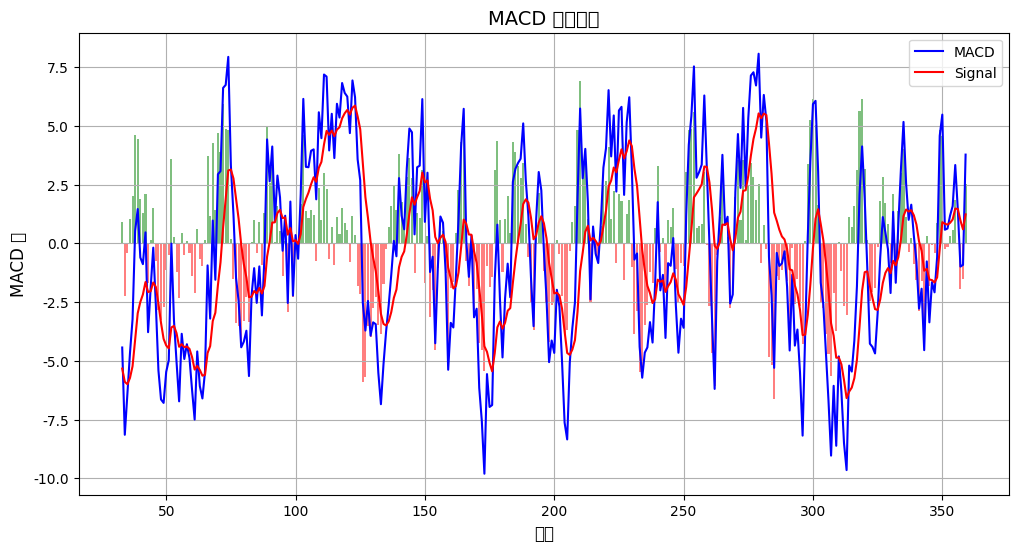

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設定 Matplotlib 字體，避免中文亂碼
plt.rcParams['axes.unicode_minus'] = False  # 避免負號變成亂碼

# 針對不同系統自動選擇適合的字體
def set_chinese_font():
    """自動設定適合的中文字體，解決 Matplotlib 中文亂碼問題"""
    import platform
    system = platform.system()

    if system == "Darwin":  # macOS
        plt.rcParams["font.sans-serif"] = ["PingFang TC"]
    elif system == "Windows":
        plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
    else:  # Linux
        plt.rcParams["font.sans-serif"] = ["Noto Sans CJK TC"]

# 呼叫函數設定字體
set_chinese_font()

# 確保 DataFrame 有正確的欄位
if not {"High", "Low", "Close"}.issubset(df.columns):
    print("錯誤：Excel 文件缺少必要的欄位 (High, Low, Close)")
else:
    # 轉換為 NumPy 陣列
    high = df["High"].values.astype(np.float64)
    low = df["Low"].values.astype(np.float64)
    close = df["Close"].values.astype(np.float64)

    # 計算 MACD 指標
    df["MACD"], df["Signal"], df["MACD_Hist"] = talib.MACD(
        close, fastperiod=12, slowperiod=26, signalperiod=9
    )

    # 繪製 MACD 圖表
    plt.figure(figsize=(12, 6))

    # 繪製 MACD 和 Signal 線
    plt.plot(df.index, df["MACD"], label="MACD", color="blue")
    plt.plot(df.index, df["Signal"], label="Signal", color="red")

    # 繪製 MACD 柱狀圖
    plt.bar(df.index, df["MACD_Hist"], color=np.where(df["MACD_Hist"] >= 0, "green", "red"), alpha=0.5)

    # 設定標題和圖例（支援中文）
    plt.title("MACD 指標分析", fontsize=14)
    plt.xlabel("時間", fontsize=12)
    plt.ylabel("MACD 值", fontsize=12)
    plt.legend()
    plt.grid()

    # 顯示圖表
    plt.show()
